# **Credit Card Fraud Detection**

## **一、引入数据**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD
import matplotlib.patches as mpatches

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from imblearn.pipeline import make_pipeline as imbalance_make_pipline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score,recall_score,f1_score,\
    accuracy_score,classification_report
from collections import Counter
from sklearn.model_selection import KFold,StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv(r'D:\文件\学习\数据集\【Kaggle】Credit Card Fraud Detection\creditcard.csv')

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#查看是否有缺失值
df.isnull().sum().max()

0

In [4]:
#查看字段名称
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#查看标签分布是否均衡
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

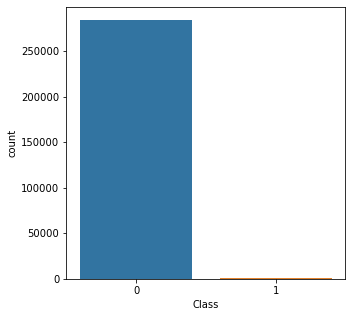

In [7]:
#画图查看label的分布情况
plt.figure(figsize=(5,5))
sns.countplot(x=df['Class'])
plt.show()

## **二、数据预处理**

#### （一）需要对Time和Amount字段做预处理，其余字段已经做过预处理的工作就不用再做了

In [8]:
from sklearn.preprocessing import StandardScaler,RobustScaler
std_scaler=StandardScaler()
rob_sclaer=RobustScaler()
df['scaler_amount']=rob_sclaer.fit_transform(
    df['Amount'].values.reshape(-1,1))
df['scaler_time']=rob_sclaer.fit_transform(
    df['Time'].values.reshape(-1,1))

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaler_amount,scaler_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960


In [10]:
df=df.drop(['Time','Amount'],axis=1)

In [11]:
scaled_amount = df['scaler_amount']
scaled_time = df['scaler_time']

In [12]:
df=df.drop(['scaler_amount','scaler_time'],axis=1)

In [13]:
df.insert(0,'scaled_amount',scaled_amount)
df.insert(1,'scaled_time',scaled_time)

## **三、对数据进行随机欠采样**

In [14]:
df=df.sample(frac=1)

In [15]:
#取出正样本
fraud_df = df.loc[df['Class'] == 1]

In [16]:
#取出负样本,数量要和正样本的一样多
non_fraud_df = df.loc[df['Class'] == 0][:492]

In [17]:
#合并生成新的数据集
normal_distributed_df = pd.concat([fraud_df,non_fraud_df],axis=0)

In [18]:
#将新生成的数据集随机打乱顺序
new_df = normal_distributed_df.sample(frac = 1,random_state=42)

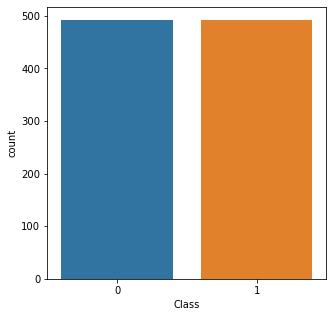

In [19]:
#用画图的方式查看新数据集的分布情况
plt.figure(figsize=(5,5))
sns.countplot(new_df['Class'])
plt.show()

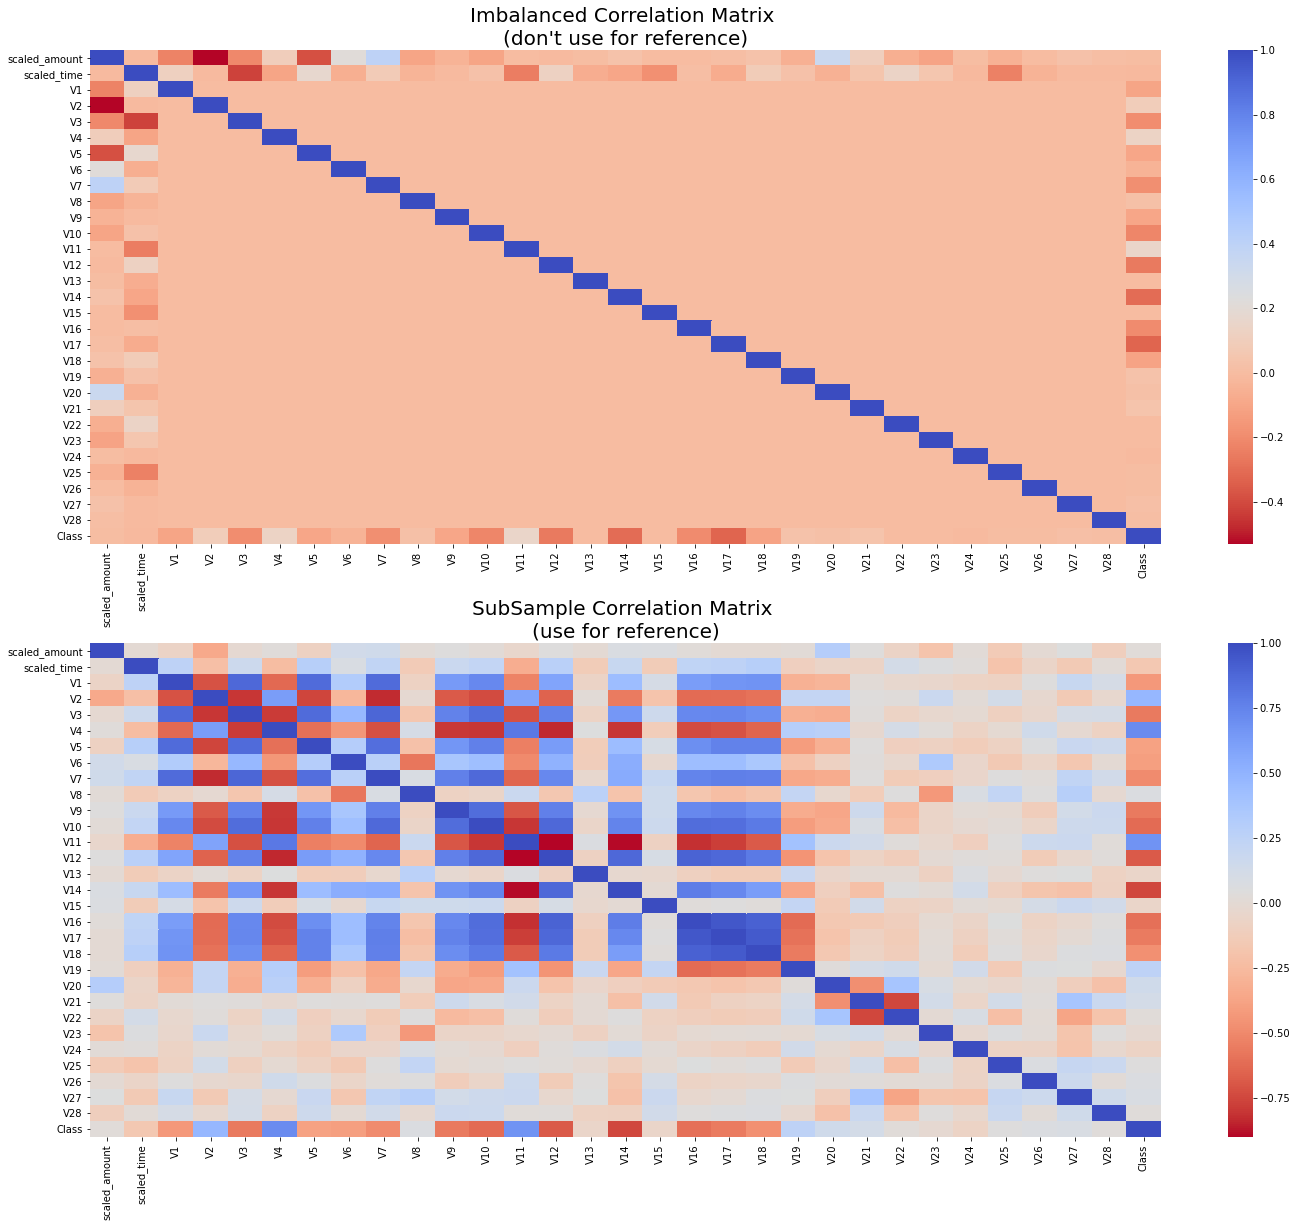

In [20]:
#查看原来样本和采样后样本的相关性分布
plt.figure(figsize=(24,20))
plt.subplot(2,1,1)
corr=df.corr()
sns.heatmap(corr,cmap='coolwarm_r')
plt.title("Imbalanced Correlation Matrix \n(don't use for reference)",fontsize=20)
plt.subplot(2,1,2)
sub_sample_corr=new_df.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm_r')
plt.title("SubSample Correlation Matrix \n(use for reference)",fontsize=20)
plt.show()

In [21]:
#查看数据的相关性，查看相关性比较强的前几个特征
new_df.corr()['Class'].sort_values()

V14             -0.751072
V12             -0.682942
V10             -0.623291
V16             -0.600269
V3              -0.563004
V9              -0.559577
V17             -0.556781
V7              -0.487106
V18             -0.464189
V1              -0.428911
V6              -0.400625
V5              -0.382777
scaled_time     -0.163870
V24             -0.075771
V13             -0.053702
V15             -0.047688
V23             -0.010327
scaled_amount    0.022894
V22              0.025761
V28              0.030161
V25              0.045205
V8               0.066556
V26              0.068952
V27              0.082707
V21              0.120257
V20              0.142815
V19              0.257561
V2               0.477845
V11              0.679172
V4               0.714908
Class            1.000000
Name: Class, dtype: float64

## **四、删除离群值**

### （一）先画箱线图整体感知一下

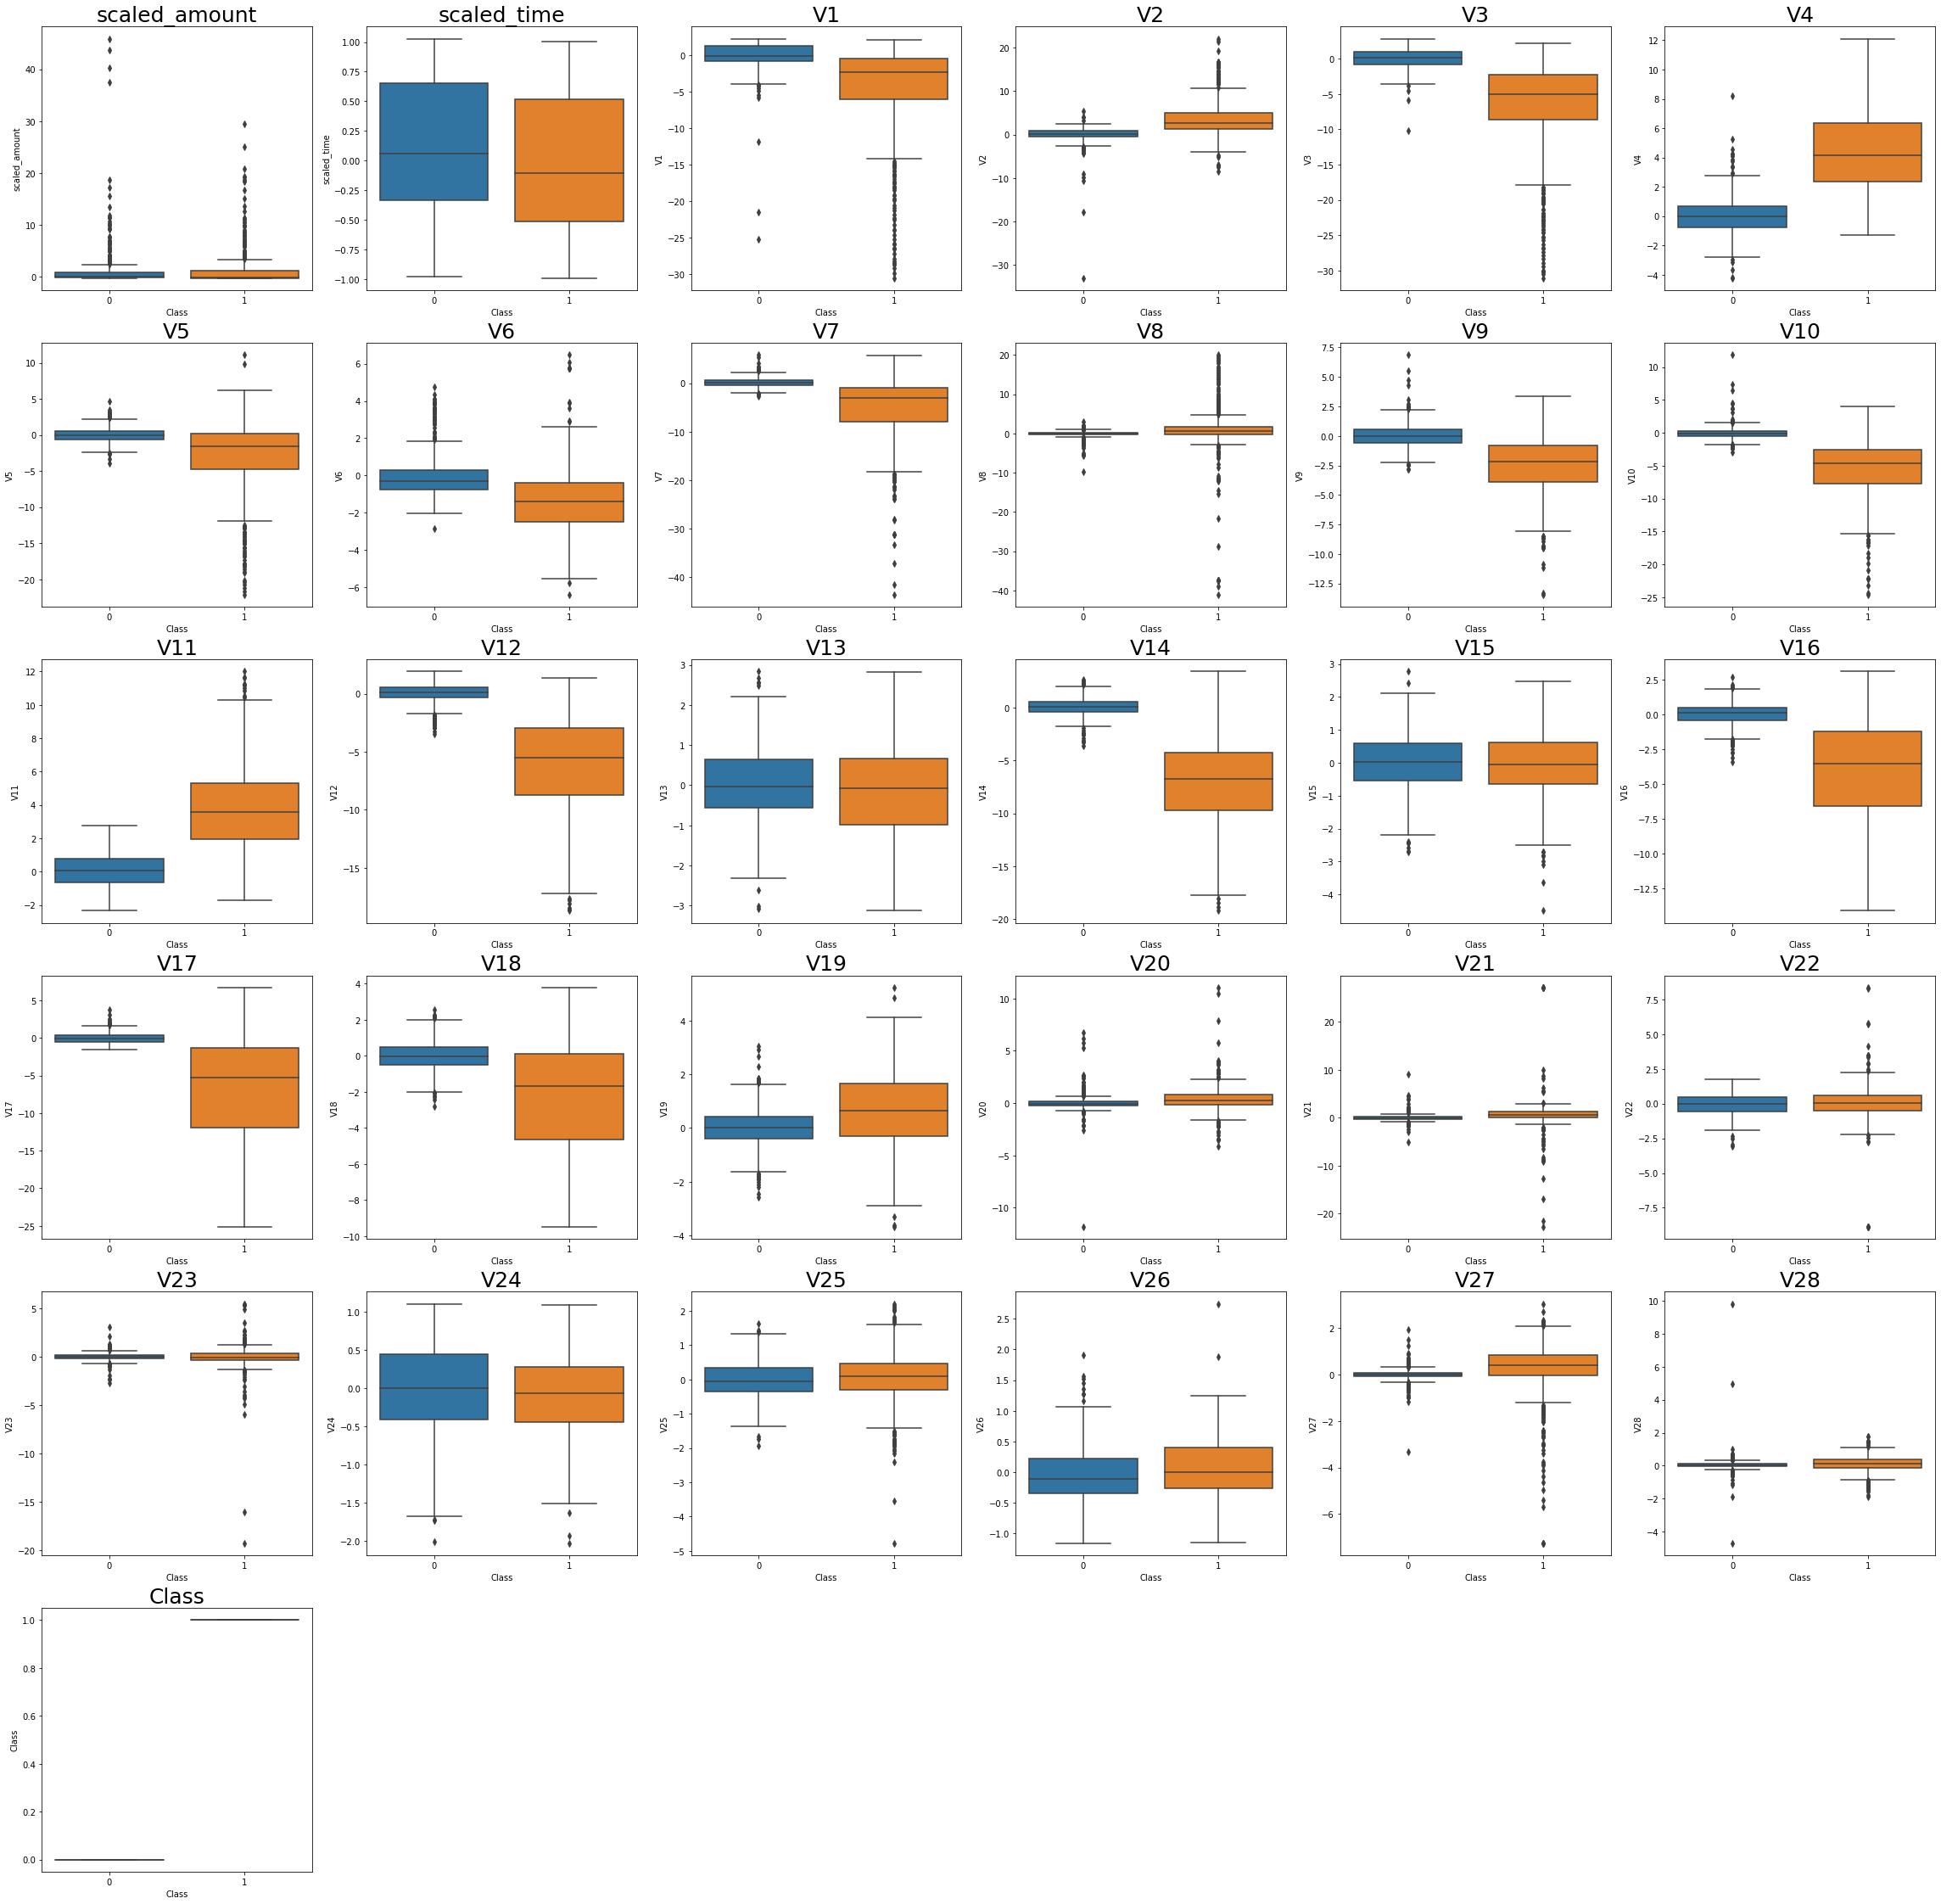

In [22]:
#画箱线图
i=0
plt.figure(figsize=(40,40))
for col in df.columns:
    i=i+1
    plt.subplot(6,6,i)
    sns.boxplot(x='Class',y='{}'.format(col),data=new_df)
    plt.title("{}".format(col),fontsize=25)
plt.show()
    

### （二）删除相关性比较强的前几个字段的离群值

In [23]:
#删除和标签高度负相关的特征的离群值，阈值设置为1.5

v14_fraud=new_df['V14'].loc[new_df['Class']==1].values

#上下四分卫数
q25,q75=np.percentile(v14_fraud,25),np.percentile(v14_fraud,75)

#上下四分卫的差值
v14_iqr=q75-q25

#设置阈值
v14_cut_off=v14_iqr*1.5

#设置上下限
v14_lower=q25-v14_cut_off
v14_upper=q75+v14_cut_off

#定义离群值
outliers=[x for x in v14_fraud if x<v14_lower or x>v14_upper]

#删除v14字段的离群值
new_df=new_df.drop(new_df[(new_df['V14']>v14_upper) | (new_df['V14']<v14_lower)].index)

len(new_df)

980

In [24]:
#用同样的方法删除v12的离群值
v12_fraud=new_df['V12'].loc[new_df['Class']==1].values

#上下四分位数
q25=np.percentile(v12_fraud,25)
q75=np.percentile(v14_fraud,75)

#上下差值
v12_iqr=q75-q25

#阈值
v12_cut_off=v12_iqr*1.5

#设置最大值和最小值
v12_lower=q25-v12_cut_off
v12_upper=q75+v12_cut_off

#收集被删除的离群值
outlier_12=[x for x in v12_fraud if x<v12_lower or x>v12_upper]

#删除离群值
new_df=new_df.drop(new_df[(new_df['V12']<v12_lower) | (new_df['V12']>v12_upper)].index)



In [25]:
#用同样的方法删除v10的离群值
v10_fraud=new_df['V10'].loc[new_df['Class']==1].values

q25=np.percentile(v10_fraud,25)
q75=np.percentile(v10_fraud,75)

#差值
v10_iqr=q75-q25

#阈值
v10_cut_off=v10_iqr*1.5

#最大最小值
v10_lower=q25-v10_cut_off
v10_upper=q75+v10_cut_off

#收集删除的离群值
outliers=[x for x in v10_fraud if x<v10_lower or x>v10_upper]

#删除离群值
new_df=new_df.drop(new_df[(new_df['V10']<v10_lower) | (new_df['V10']>v10_upper)].index)

## **五、降维**

In [26]:
X=new_df.drop('Class',axis=1)
y=new_df['Class']

In [27]:
#对比三种降维算法的效果
#TSNE
X_reduced_tsne=TSNE(n_components=2,random_state=42).fit_transform(X.values)
#PCA
X_reduced_pca=PCA(n_components=2,random_state=42).fit_transform(X.values)
#SVD
X_reduced_svd=TruncatedSVD(n_components=2,algorithm='randomized',
                          random_state=42).fit_transform(X.values)

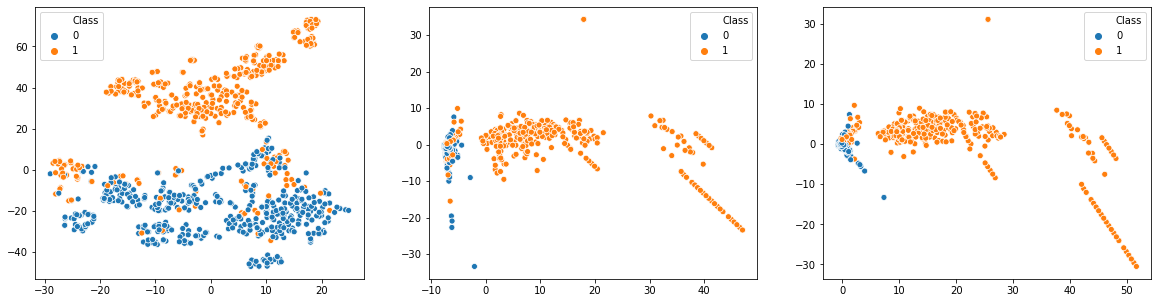

In [28]:
#画图的方式查看降低维度后的数据表现
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=X_reduced_tsne[:,0],y=X_reduced_tsne[:,1],hue=y)
plt.subplot(1,3,2)
sns.scatterplot(x=X_reduced_pca[:,0],y=X_reduced_pca[:,1],hue=y)
plt.subplot(1,3,3)
sns.scatterplot(x=X_reduced_svd[:,0],y=X_reduced_svd[:,1],hue=y)
plt.show()